In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("/mnt/titanic.csv")

In [3]:
df.sample(1)

,passenger_id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
802,803,3,0,"Flynn, Mr. John",0,NaN,0,0,368323,6.95,NaN,Q,NaN,NaN,NaN


In [4]:
# data preprocessing
df = pd.get_dummies(df, columns=["embarked"], dtype='uint8')
df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

In [5]:
df.sample(1)

,passenger_id,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,boat,body,home.dest,embarked_C,embarked_Q,embarked_S
1298,1299,3,0,"Wittevrongel, Mr. Camille",0,36.0,0,0,345771,9.5,NaN,NaN,NaN,NaN,0,0,1


In [6]:
df.isna().sum()

,0
passenger_id,0
pclass,0
survived,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0


In [7]:
model = sm.GLM.from_formula(
    formula = 'survived ~ passenger_id + pclass + sex + age + sibsp + parch + ticket + fare + embarked_C + embarked_Q + embarked_S',
    data = df,
    family = sm.families.Binomial()
)

result = model.fit()
result.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1309
Model:                            GLM   Df Residuals:                      373
Model Family:                Binomial   Df Model:                          935
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 17 Jan 2026   Deviance:                       1473.7
Time:                        13:30:35   Pearson chi2:                 7.21e+16
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -9.368e+16   1.54e+10  -6.08e+06      0.000   -9.37e+16   -9.37e+16
ticket[T.110413]              5.114e+15   1.05e+09   4.89e+06      0.000    5.11e+15    5.11e+15
ticket[T.110465]              2.996e+16   5.26e+09    5.7e+06      0.000       3e+16       3e+16
ticket[T.110469]              5.254e+16   9.22e+09    5.7e+06      0.000    5.25e+16    5.25e+16
ticket[T.110489]              5.229e+16   9.14e+09   5.72e+06      0.000    5.23e+16    5.23e+16
ticket[T.110564]              6.074e+16   9.14e+09   6.64e+06      0.000    6.07e+16    6.07e+16
ticket[T.110813]              9.721e+15   1.72e+09   5.66e+06      0.000    9.72e+15    9.72e+15
ticket[T.111163]              6.155e+16   9.22e+09   6.67e+06      0.000    6.15e+16    6.15e+16
ticket[T.111240]              4.667e+16   8.08e+09   5.78e+06      0.000    4.67e+16    4.67e+16
ticket[T.111320]              4.558e+16   7.32e+09   6.23e+06      0.000    4.56e+16    4.56e+16
ticket[T.111361]              2.807e+16   4.35e+09   6.45e+06      0.000    2.81e+16    2.81e+16
ticket[T.111369]              5.772e+16   8.62e+09    6.7e+06      0.000    5.77e+16    5.77e+16
ticket[T.111426]              6.158e+16   9.14e+09   6.74e+06      0.000    6.16e+16    6.16e+16
ticket[T.111427]              6.075e+16   9.14e+09   6.65e+06      0.000    6.07e+16    6.07e+16
ticket[T.111428]              6.167e+16   9.14e+09   6.75e+06      0.000    6.17e+16    6.17e+16
ticket[T.112050]              7.775e+16   1.32e+10    5.9e+06      0.000    7.77e+16    7.77e+16
ticket[T.112051]              8.189e+16   1.32e+10   6.21e+06      0.000    8.19e+16    8.19e+16
ticket[T.112052]              7.758e+16   1.32e+10   5.88e+06      0.000    7.76e+16    7.76e+16
ticket[T.112053]              5.416e+16   8.61e+09   6.29e+06      0.000    5.42e+16    5.42e+16
ticket[T.112058]              8.241e+16   1.32e+10   6.25e+06      0.000    8.24e+16    8.24e+16
ticket[T.112059]              8.247e+16   1.32e+10   6.25e+06      0.000    8.25e+16    8.25e+16
ticket[T.112277]              5.732e+16   8.46e+09   6.77e+06      0.000    5.73e+16    5.73e+16
ticket[T.112377]              5.825e+16   8.96e+09    6.5e+06      0.000    5.83e+16    5.83e+16
ticket[T.112378]              2.455e+16   4.13e+09   5.94e+06      0.000    2.45e+16    2.45e+16
ticket[T.112379]              4.406e+16   7.15e+09   6.16e+06      0.000    4.41e+16    4.41e+16
ticket[T.112901]              5.913e+16   9.14e+09   6.47e+06      0.000    5.91e+16    5.91e+16
ticket[T.113028]              5.642e+16   9.14e+09   6.17e+06      0.000    5.64e+16    5.64e+16
ticket[T.113038]              4.156e+16   6.71e+09    6.2e+06      0.000    4.16e+16    4.16e+16
ticket[T.113043]              5.529e+16   8.84e+09   6.25e+06      0.000    

***-> ticket-id & passener_id are features for identification which leads to a really bad model after training -> drop và chạy lại***

In [ ]:
model = sm.GLM.from_formula(
    formula = 'survived ~ pclass + sex + age + sibsp + parch + fare + embarked_C + embarked_Q + embarked_S',
    data = df,
    family = sm.families.Binomial()
)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               survived   No. Observations:                 1309
Model:                            GLM   Df Residuals:                     1299
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -599.65
Date:                Sat, 17 Jan 2026   Deviance:                       1199.3
Time:                        08:49:23   Pearson chi2:                 1.32e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3389
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.6802   1.23e+04      0.002      0.999   -2.41e+04    2.41e+04
pclass        -0.9672      0.117     -8.295      0.000      -1.196      -0.739
sex            2.5945      0.160     16.211      0.000       2.281       2.908
age           -0.0360      0.006     -5.673      0.000      -0.048      -0.024
sibsp         -0.3067      0.090     -3.396      0.001      -0.484      -0.130
parch         -0.0225      0.091     -0.248      0.804      -0.200       0.155
fare           0.0014      0.002      0.727      0.467      -0.002       0.005
embarked_C   -18.3848   1.23e+04     -0.001      0.999   -2.41e+04    2.41e+04
embarked_Q   -18.9157   1.23e+04     -0.002      0.999   -2.41e+04    2.41e+04
embarked_S   -18.9850   1.23e+04     -0.002      0.999   -2.41e+04    2.41e+04
==============================================================================
"""

In [ ]:
preds = result.predict()
y_test = df['survived']
print(f'Area under the curve: {roc_auc_score(y_test, preds):.4f}')


Area under the curve: 0.8443


**Train/test split implementation**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['survived'], test_size = 0.2, random_state = 42)
print(f'X_train shape: {X_train.shape}, X_test shape: {X_test.shape}')
tsp_model = sm.GLM.from_formula(formula = 'survived ~ pclass + sex + age + sibsp + parch + fare + embarked_C + embarked_Q + embarked_S',
                                data = X_train,
                                family = sm.families.Binomial())
tsp_result = tsp_model.fit()
tsp_result.summary()
tsp_preds = tsp_result.predict(X_test)

print(f'Train/test split AUC Score: {roc_auc_score(y_test, tsp_preds):.4f}')

X_train shape: (1047, 17), X_test shape: (262, 17)
Train/test split AUC Score: 0.8578


**Stratify Implementation**

In [12]:
scores = []
for i in range(100):
  X_train, X_test, y_train, y_test = train_test_split(df, df.survived, random_state = None, test_size = 0.2, stratify = df['survived'])
  tsp_model = sm.GLM.from_formula(formula = 'survived ~ pclass + sex + age + sibsp + parch + fare + embarked_C + embarked_Q + embarked_S',
                                  data = X_train,
                                  family = sm.families.Binomial())
  tsp_result = tsp_model.fit()
  tsp_result.summary()
  tsp_preds = tsp_result.predict(X_test)

  scores.append(roc_auc_score(y_test, tsp_preds))
print(scores)
print(f'Stratified AUC: {scores[-1]:.4f}')

[np.float64(0.8274691358024692), np.float64(0.8358333333333333), np.float64(0.8367283950617285), np.float64(0.8546604938271604), np.float64(0.8405555555555556), np.float64(0.8530246913580248), np.float64(0.8415432098765432), np.float64(0.902962962962963), np.float64(0.882962962962963), np.float64(0.834537037037037), np.float64(0.8412654320987655), np.float64(0.8664197530864198), np.float64(0.8564197530864197), np.float64(0.814104938271605), np.float64(0.8153086419753087), np.float64(0.8548765432098765), np.float64(0.8430246913580246), np.float64(0.8426234567901234), np.float64(0.8391666666666666), np.float64(0.8248765432098766), np.float64(0.8191358024691358), np.float64(0.8612654320987655), np.float64(0.8530864197530864), np.float64(0.809320987654321), np.float64(0.8446604938271606), np.float64(0.8557407407407408), np.float64(0.8088888888888889), np.float64(0.8617901234567902), np.float64(0.8012962962962963), np.float64(0.8720679012345679), np.float64(0.8448456790123458), np.float64(0

**Diagnostics:**

In [13]:
diag_df = pd.DataFrame(data = scores, columns = ['scores'])
print(diag_df["scores"].describe())
print(f'Kurtosis:\t {round(diag_df["scores"].kurtosis(), 5)}')
print(f'Skewness:\t {round(diag_df["scores"].skew(), 5)}')

count    100.000000
mean       0.839839
std        0.022842
min        0.792932
25%        0.823194
50%        0.841157
75%        0.855818
max        0.902963
Name: scores, dtype: float64
Kurtosis:	 -0.43545
Skewness:	 0.09792


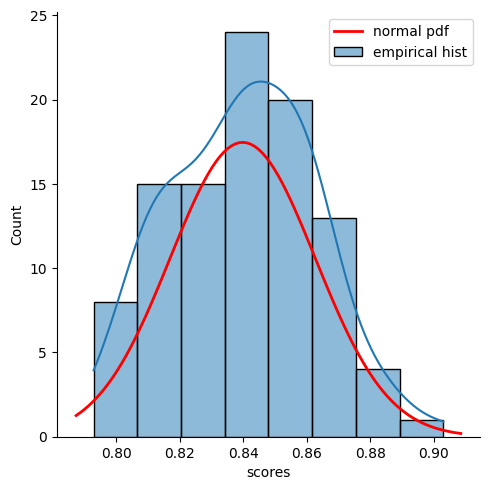

In [14]:
from scipy import stats
import seaborn as sns
ax = sns.displot(data = diag_df.scores, kde = True, label = 'empirical hist')
x0, x1 = ax.ax.get_xlim()
x_pdf = np.linspace(x0, x1, len(diag_df))
y_pdf = stats.norm.pdf(x_pdf, diag_df.scores.mean(), diag_df.scores.std())
ax.ax.plot(x_pdf, y_pdf, 'r', lw = 2, label = 'normal pdf')
ax.ax.legend()

In [15]:
# Ks-testing
ks = stats.kstest((diag_df.scores - diag_df.scores.mean())/diag_df.scores.std(), 'norm')
alpha = 0.005
print(ks[1])
if ks[1] < alpha:
  print("Kolmogorov Smirnov test: reject H0 about normality")
else:
  print("Kolmogorov Smirnov test: fail to reject H0 about normality")

0.708638446825647
Kolmogorov Smirnov test: fail to reject H0 about normality


**Tendency to overfitting problem in logistic regression testing:**

In [17]:
for i in range(10): # -- reduces to 10% of data used to train
  X_train, X_test, y_train, y_test = train_test_split(df, df['survived'], test_size = 0.2, random_state = None)
  tsp_model = sm.GLM.from_formula(formula = 'survived ~ pclass + sex + age + sibsp + parch + fare + embarked_C + embarked_Q + embarked_S',
                                  data = X_train,
                                  family = sm.families.Binomial())
  tsp_result = tsp_model.fit()
  tsp_result.summary()
  tsp_preds = tsp_result.predict(X_test)

  scores.append(roc_auc_score(y_test, tsp_preds))
  predsTrain = tsp_result.predict(X_train)
  preds = tsp_result.predict(X_test)

  print("Train AUC:", round(roc_auc_score(y_train, predsTrain), 2), "Valid AUC:", round(roc_auc_score(y_test, preds), 2))

Train AUC: 0.85 Valid AUC: 0.84
Train AUC: 0.85 Valid AUC: 0.84
Train AUC: 0.85 Valid AUC: 0.8
Train AUC: 0.84 Valid AUC: 0.85
Train AUC: 0.85 Valid AUC: 0.8
Train AUC: 0.84 Valid AUC: 0.88
Train AUC: 0.85 Valid AUC: 0.83
Train AUC: 0.85 Valid AUC: 0.82
Train AUC: 0.85 Valid AUC: 0.82
Train AUC: 0.85 Valid AUC: 0.82


In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 10, shuffle = True, random_state = None)
for train, test in kfold.split(df.index.values):

  kf_model = sm.GLM.from_formula(formula = 'survived ~ pclass + sex + age + sibsp + parch + fare + embarked_C + embarked_Q + embarked_S',
                                  data = df.iloc[train],
                                  family = sm.families.Binomial())
  kf_result = kf_model.fit()
  kf_preds_train = kf_result.predict(df.iloc[train])
  kf_preds = kf_result.predict(df.iloc[test])
  print("Train AUC:", round(roc_auc_score(df.iloc[train].survived, kf_preds_train), 4), "Valid AUC:", round(roc_auc_score(df.iloc[test].survived, kf_preds), 4))

Train AUC: 0.8446 Valid AUC: 0.8343
Train AUC: 0.8419 Valid AUC: 0.8663
Train AUC: 0.8435 Valid AUC: 0.8552
Train AUC: 0.8431 Valid AUC: 0.8559
Train AUC: 0.8464 Valid AUC: 0.8285
Train AUC: 0.8457 Valid AUC: 0.8054
Train AUC: 0.8483 Valid AUC: 0.8038
Train AUC: 0.8425 Valid AUC: 0.8574
Train AUC: 0.8452 Valid AUC: 0.8429
Train AUC: 0.8434 Valid AUC: 0.8484


*how about 5-fold?*

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True, random_state = None)
for train, test in kfold.split(df.index.values):

  kf_model = sm.GLM.from_formula(formula = 'survived ~ pclass + sex + age + sibsp + parch + fare + embarked_C + embarked_Q + embarked_S',
                                  data = df.iloc[train],
                                  family = sm.families.Binomial())
  kf_result = kf_model.fit()
  kf_preds_train = kf_result.predict(df.iloc[train])
  kf_preds = kf_result.predict(df.iloc[test])
  print("Train AUC:", round(roc_auc_score(df.iloc[train].survived, kf_preds_train), 4), "Valid AUC:", round(roc_auc_score(df.iloc[test].survived, kf_preds), 4))

Train AUC: 0.8467 Valid AUC: 0.8297
Train AUC: 0.8435 Valid AUC: 0.8437
Train AUC: 0.8502 Valid AUC: 0.8152
Train AUC: 0.833 Valid AUC: 0.8852
Train AUC: 0.8476 Valid AUC: 0.8258


**Averaging 10 times of 10-fold CV and 10 times of 5-fold CV to see the variance:**


*10 times of 5-folds CV*

In [ ]:
for i in range(10):
  kfold = KFold(n_splits = 10, shuffle = True, random_state = None)
  trainRes = []
  valRes = []
  for train, test in kfold.split(df.index.values):

    kf_model = sm.GLM.from_formula(formula = 'survived ~ pclass + sex + age + sibsp + parch + fare + embarked_C + embarked_Q + embarked_S',
                                    data = df.iloc[train],
                                    family = sm.families.Binomial())
    kf_result = kf_model.fit()
    kf_preds_train = kf_result.predict(df.iloc[train])
    kf_preds = kf_result.predict(df.iloc[test])
    trainRes.append(roc_auc_score(df.iloc[train].survived, kf_preds_train))
    valRes.append(roc_auc_score(df.iloc[test].survived, kf_preds))
  print("Train AUC:", round(np.mean(trainRes), 4), "Valid AUC:", round(np.mean(valRes), 4))

Train AUC: 0.8444 Valid AUC: 0.8402
Train AUC: 0.8444 Valid AUC: 0.8385
Train AUC: 0.8443 Valid AUC: 0.8411
Train AUC: 0.8444 Valid AUC: 0.8416
Train AUC: 0.8442 Valid AUC: 0.839
Train AUC: 0.8445 Valid AUC: 0.8356
Train AUC: 0.8445 Valid AUC: 0.8421
Train AUC: 0.8444 Valid AUC: 0.8386
Train AUC: 0.8445 Valid AUC: 0.84
Train AUC: 0.8444 Valid AUC: 0.8406


*10 times of 5-folds CV*

In [ ]:
for i in range(10):
  kfold = KFold(n_splits = 5, shuffle = True, random_state = None)
  trainRes = []
  valRes = []
  for train, test in kfold.split(df.index.values):

    kf_model = sm.GLM.from_formula(formula = 'survived ~ pclass + sex + age + sibsp + parch + fare + embarked_C + embarked_Q + embarked_S',
                                    data = df.iloc[train],
                                    family = sm.families.Binomial())
    kf_result = kf_model.fit()
    kf_preds_train = kf_result.predict(df.iloc[train])
    kf_preds = kf_result.predict(df.iloc[test])
    trainRes.append(roc_auc_score(df.iloc[train].survived, kf_preds_train))
    valRes.append(roc_auc_score(df.iloc[test].survived, kf_preds))
  print("Train AUC:", round(np.mean(trainRes), 4), "Valid AUC:", round(np.mean(valRes), 4))

Train AUC: 0.8448 Valid AUC: 0.8394
Train AUC: 0.8445 Valid AUC: 0.8398
Train AUC: 0.8445 Valid AUC: 0.8389
Train AUC: 0.8446 Valid AUC: 0.8406
Train AUC: 0.8444 Valid AUC: 0.8423
Train AUC: 0.8443 Valid AUC: 0.842
Train AUC: 0.8449 Valid AUC: 0.843
Train AUC: 0.8447 Valid AUC: 0.8421
Train AUC: 0.8449 Valid AUC: 0.838
Train AUC: 0.8444 Valid AUC: 0.8395


**Let's test repeated CV but this time with stratification**

*10 times of 5-folds stratified CV*

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
for i in range(10):
    skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=None)

    trainRes = []
    valRes = []

    for train, test in skf.split(df.index.values, df.survived.values):

        kf_model = sm.GLM.from_formula(
            formula='survived ~ pclass + sex + age + sibsp + parch + fare + embarked_C + embarked_Q + embarked_S',
            data=df.iloc[train],
            family=sm.families.Binomial()
        )

        kf_result = kf_model.fit()

        kf_preds_train = kf_result.predict(df.iloc[train])
        kf_preds_val   = kf_result.predict(df.iloc[test])

        trainRes.append(
            roc_auc_score(df.iloc[train].survived, kf_preds_train)
        )
        valRes.append(
            roc_auc_score(df.iloc[test].survived, kf_preds_val)
        )

    print(
        "Train AUC:", round(np.mean(trainRes), 4),
        "Valid AUC:", round(np.mean(valRes), 4)
    )

Train AUC: 0.8442 Valid AUC: 0.8421
Train AUC: 0.8448 Valid AUC: 0.84
Train AUC: 0.8444 Valid AUC: 0.8412
Train AUC: 0.8444 Valid AUC: 0.8391
Train AUC: 0.8446 Valid AUC: 0.838
Train AUC: 0.8448 Valid AUC: 0.8399
Train AUC: 0.8447 Valid AUC: 0.8391
Train AUC: 0.8448 Valid AUC: 0.8392
Train AUC: 0.8447 Valid AUC: 0.8387
Train AUC: 0.8446 Valid AUC: 0.8409


*10 times of 10-folds stratified CV*

In [ ]:
for i in range(10):
    skf = StratifiedKFold(n_splits=10,shuffle=True,random_state=None)

    trainRes = []
    valRes = []

    for train, test in skf.split(df.index.values, df.survived.values):

        kf_model = sm.GLM.from_formula(
            formula='survived ~ pclass + sex + age + sibsp + parch + fare + embarked_C + embarked_Q + embarked_S',
            data=df.iloc[train],
            family=sm.families.Binomial()
        )

        kf_result = kf_model.fit()

        kf_preds_train = kf_result.predict(df.iloc[train])
        kf_preds_val   = kf_result.predict(df.iloc[test])

        trainRes.append(
            roc_auc_score(df.iloc[train].survived, kf_preds_train)
        )
        valRes.append(
            roc_auc_score(df.iloc[test].survived, kf_preds_val)
        )

    print(
        "Train AUC:", round(np.mean(trainRes), 4),
        "Valid AUC:", round(np.mean(valRes), 4)
    )

Train AUC: 0.8443 Valid AUC: 0.8421
Train AUC: 0.8444 Valid AUC: 0.8403
Train AUC: 0.8444 Valid AUC: 0.8393
Train AUC: 0.8444 Valid AUC: 0.8367
Train AUC: 0.8444 Valid AUC: 0.8409
Train AUC: 0.8443 Valid AUC: 0.8382
Train AUC: 0.8444 Valid AUC: 0.8396
Train AUC: 0.8444 Valid AUC: 0.8395
Train AUC: 0.8445 Valid AUC: 0.842
Train AUC: 0.8443 Valid AUC: 0.8405


**Conclusion on stability:**
It seems that the bigger the fold, with stratified CV, the more stable the results become!